# Feature selection

Using Bayesian Information Criterion (BIC), we calculate it based on every subset of features of size 1 to 6. Then, we select the features with the lowest BIC to train our model on.

The BIC evaluates the tradeoff between the model's fit and its complexity. This allows us to avoid overfitting.

In [1]:
import statsmodels.api as sm
from sklearn.datasets import load_breast_cancer
import numpy as np
from itertools import combinations


breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

n_features = X.shape[1]
best_bic = np.inf
best_features = None

for k in range(1, 7):
  for combo in combinations(range(n_features), k):
    # Get the subset of features
    X_subset = X[:, combo]

    # Add constant column of 1's to serve as the bias term
    X_with_const = sm.add_constant(X_subset)

    try:
      model = sm.Logit(y, X_with_const).fit(disp=False)
      bic = model.bic

      # BIC is better if it's smaller
      if bic < best_bic:
        best_bic = bic
        best_features = combo
    except Exception as e:
        print(e)
        print("combo:", breast_cancer.feature_names[list(combo)])
        continue

  print(f"Done with {k}-element subsets")
  print("Best BIC:", best_bic)
  print("Best features:", breast_cancer.feature_names[list(best_features)])

print("\nOverall best BIC:", best_bic)
print("Overall best features:", breast_cancer.feature_names[list(best_features)])

Done with 1-element subsets
Best BIC: 222.16770164820912
Best features: ['worst perimeter']
Done with 2-element subsets
Best BIC: 155.16114068137867
Best features: ['worst area' 'worst concave points']
Done with 3-element subsets
Best BIC: 123.36269508812477
Best features: ['worst texture' 'worst area' 'worst concave points']
Done with 4-element subsets
Best BIC: 114.0105885050768
Best features: ['radius error' 'worst texture' 'worst area' 'worst concave points']


KeyboardInterrupt: 

## Selected Features

Using BIC, 5 features were selected:
* radius error [index 10]
* worst texture [index 21]
* worst area [index 23]
* worst smoothness [index 24]
* worst concave points [index 27[link text](https://)]

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random

# From BIC, the best features correspond to the following indices
features = (10, 21, 23, 24, 27)

# Load data
breast_cancer = load_breast_cancer()

# Get the best features based on BIC
X = breast_cancer.data[:, list(features)]
y = breast_cancer.target

# Split data into 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=15)
model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

c:\Users\heeja\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\heeja\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Accuracy: 0.986013986013986 random_state: 315


c:\Users\heeja\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\heeja\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

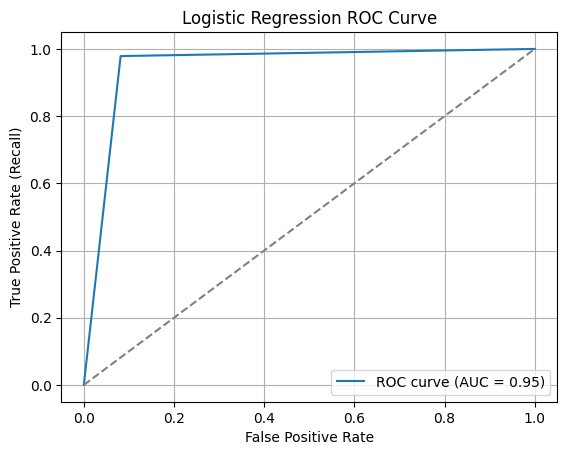

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test = true labels
# y_scores = predicted probabilities (e.g., model.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)  # Area under the ROC curve

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
print(best_features)
print("best feature:", breast_cancer.feature_names[list(best_features)])


(10, 21, 23, 24, 27)
best feature: ['radius error' 'worst texture' 'worst area' 'worst smoothness'
 'worst concave points']
7


## Calculating metrics

In [6]:
def confusion_matrix(y_test, y_pred):
  tp, fp, fn, tn = 0, 0, 0, 0

  for i in range(len(y_test)):
    if y_test[i] == 0:
      if y_test[i] == y_pred[i]:
        tn += 1
      else:
        fp += 1
    else:
      if y_test[i] == y_pred[i]:
        tp += 1
      else:
        fn += 1

  return tp, fp, fn, tn


def MCC(tp, fp, fn, tn):
  numerator = (tp * tn) - (fp * fn)
  denom = sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
  return numerator / denom

def calculate_metrics(y_test, y_pred):
  # Calculate metrics
  tp, fp, fn, tn = confusion_matrix(y_test, y_pred)
  mcc = MCC(tp, fp, fn, tn)
  ppv = tp / (tp + fp)
  tpr = tp / (tp + fn)
  tnr = tn / (tn + fp)
  fpr = fp / (fp + tn)
  fnr = fn / (fn + tp)

  print("Accuracy:           ", accuracy_score(y_test, y_pred))
  print("True positive rate: ", tpr)
  print("True negative rate: ", tnr)
  print("False positive rate:", fpr)
  print("False negative rate:", fnr)
  print("Precision:          ", ppv)
  print("MCC:                ", mcc)

In [19]:
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

features = (10, 21, 23, 24, 27)

# Split data into 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
X = breast_cancer.data[:, list(features)]
y = breast_cancer.target

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=15)
model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

calculate_metrics(y_test, y_pred)

Accuracy:            0.9790209790209791
True positive rate:  1.0
True negative rate:  0.9444444444444444
False positive rate: 0.05555555555555555
False negative rate: 0.0
Precision:           0.967391304347826
MCC:                 0.9558490168406144


c:\Users\heeja\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


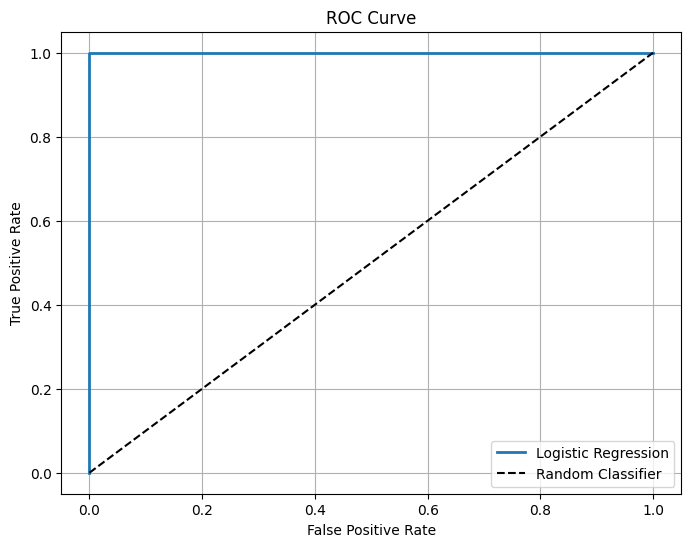

In [21]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


## Neural Network Model

In [22]:
import tensorflow as tf
import keras
import scikeras
print(tf.__version__)
print(keras.__version__)
print(scikeras.__version__)

2.12.0
2.12.0
0.12.0


In [23]:
!pip install keras==2.12

In [24]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import L1, L2


# Loading breast cancer data
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

# Split data into 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


def create_model(regularization="l2", regularization_param=0.01, momentum_term=0.9, num_neurons1=10, num_neurons2=0, learning_rate=0.01):
  model = Sequential()

  # Regularization technique is either L1 or L2 regularization
  regularizer = L1(regularization_param)
  if regularization != "l1":
    regularizer = L2(regularization_param)

  # Create input and hidden layer
  model.add(Dense(num_neurons1, activation="relu", input_dim=30, activity_regularizer=regularizer))

  if num_neurons2 > 0:
    model.add(Dense(num_neurons2, activation="relu", activity_regularizer=regularizer))

  # Create output layer
  model.add(Dense(1, activation="sigmoid", activity_regularizer=regularizer))

  # Create optimizer with momentum term
  optimizer = SGD(momentum=momentum_term, learning_rate=learning_rate)

  model.compile(optimizer=optimizer, loss="mse", metrics=["accuracy", "mse"])
  return model

param_dist = {
    "regularization": ["l1", "l2"],
    "regularization_param": [0.01, 0.1, 0.3],
    "momentum_term": [0.5, 0.7, 0.9],
    "learning_rate": [0.01, 0.001],
    "batch_size": [1, 5, 10],  # batch_size will get passed to model.fit() which is called internally by grid_search.fit()
    "epochs": [50, 100, 150],
    "num_neurons1": [3, 5, 10],
    "num_neurons2": [0, 3, 5],
}

# Create KerasClassifier wrapper for scikit-learn
model = KerasClassifier(build_fn=create_model)

# Perform grid search with cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
rand_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, cv=kfold, scoring='accuracy', n_iter=100, random_state=42)
result = rand_search.fit(X_train, y_train)

# Print results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))



C:\Users\heeja\AppData\Local\Temp\ipykernel_18556\1427679212.py:64: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Epoch 1/50
34/34 [==============================] - 1s 826us/step - loss: 0.4044 - accuracy: 0.4176 - mse: 0.2666
Epoch 2/50
34/34 [==============================] - 0s 704us/step - loss: 0.3166 - accuracy: 0.6147 - mse: 0.2469
Epoch 3/50
34/34 [==============================] - 0s 740us/step - loss: 0.2970 - accuracy: 0.6382 - mse: 0.2433
Epoch 4/50
34/34 [==============================] - 0s 711us/step - loss: 0.2882 - accuracy: 0.6382 - mse: 0.2413
Epoch 5/50
34/34 [==============================] - 0s 737us/step - loss: 0.2835 - accuracy: 0.6353 - mse: 0.2400
Epoch 6/50
34/34 [==============================] - 0s 704us/step - loss: 0.2801 - accuracy: 0.6353 - mse: 0.2391
Epoch 7/50
34/34 [==============================] - 0s 708us/step - loss: 0.2778 - accuracy: 0.6382 - mse: 0.2382
Epoch 8/50
34/34 [==============================] - 0s 753us/step - loss: 0.2760 - accuracy: 0.6382 - mse: 0.2373
Epoch 9/50
34/34 [==============================] - 0s 710us/step - loss: 0.2747 - accur

```
Best: 0.976525 using {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 5, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 1}
0.863639 (0.144079) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 3, 'momentum_term': 0.7, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 10}
0.969466 (0.020532) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 3, 'momentum_term': 0.7, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 5}
0.453379 (0.185611) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 5, 'momentum_term': 0.7, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 10}
0.901368 (0.041238) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 10}
0.967086 (0.022838) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 5, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 150, 'batch_size': 5}
0.917729 (0.042834) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 5, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 1}
0.863721 (0.072514) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 10}
0.943721 (0.023791) with: {'regularization_param': 0.01, 'regularization': 'l1', 'num_neurons2': 0, 'num_neurons1': 5, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 1}
0.690041 (0.095443) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 10, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 10}
0.917866 (0.014714) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 10}
0.673680 (0.135716) with: {'regularization_param': 0.1, 'regularization': 'l1', 'num_neurons2': 3, 'num_neurons1': 10, 'momentum_term': 0.7, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 5}
0.645828 (0.152550) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 5, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 5}
0.877702 (0.152632) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 10, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 1}
0.950670 (0.017358) with: {'regularization_param': 0.01, 'regularization': 'l1', 'num_neurons2': 3, 'num_neurons1': 5, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 1}
0.967086 (0.020269) with: {'regularization_param': 0.01, 'regularization': 'l1', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 150, 'batch_size': 10}
0.957702 (0.026451) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 10, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 1}
0.943694 (0.030964) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 3, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 10}
0.692503 (0.122531) with: {'regularization_param': 0.1, 'regularization': 'l1', 'num_neurons2': 5, 'num_neurons1': 3, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 10}
0.962462 (0.011439) with: {'regularization_param': 0.01, 'regularization': 'l1', 'num_neurons2': 3, 'num_neurons1': 5, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 1}
0.385144 (0.060567) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 5, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 10}
0.936580 (0.036197) with: {'regularization_param': 0.1, 'regularization': 'l1', 'num_neurons2': 0, 'num_neurons1': 5, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 150, 'batch_size': 5}
0.736826 (0.220855) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 5, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 1}
0.745937 (0.152680) with: {'regularization_param': 0.1, 'regularization': 'l1', 'num_neurons2': 5, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 10}
0.955376 (0.025154) with: {'regularization_param': 0.01, 'regularization': 'l1', 'num_neurons2': 3, 'num_neurons1': 3, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 10}
0.514528 (0.210136) with: {'regularization_param': 0.3, 'regularization': 'l1', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 10}
0.927168 (0.040415) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 5, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 5}
0.962435 (0.004750) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 1}
0.375732 (0.053969) with: {'regularization_param': 0.3, 'regularization': 'l1', 'num_neurons2': 3, 'num_neurons1': 10, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 5}
0.950725 (0.031878) with: {'regularization_param': 0.01, 'regularization': 'l1', 'num_neurons2': 3, 'num_neurons1': 5, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 5}
0.964788 (0.012889) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 10}
0.967141 (0.015596) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 10}
0.948317 (0.021883) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 5, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 150, 'batch_size': 1}
0.624268 (0.053969) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 1}
0.371053 (0.056827) with: {'regularization_param': 0.3, 'regularization': 'l1', 'num_neurons2': 0, 'num_neurons1': 10, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 10}
0.964843 (0.019524) with: {'regularization_param': 0.01, 'regularization': 'l1', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 10}
0.877893 (0.033895) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 10, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 10}
0.375732 (0.053969) with: {'regularization_param': 0.3, 'regularization': 'l1', 'num_neurons2': 3, 'num_neurons1': 10, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 5}
0.450944 (0.139516) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 10, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 5}
0.948317 (0.023113) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 150, 'batch_size': 5}
0.962380 (0.020276) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 5, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 5}
0.498085 (0.177249) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 5, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 10}
0.703748 (0.148814) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 3, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 10}
0.896717 (0.048441) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 5, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 1}
0.915458 (0.076782) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 10, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 10}
0.941313 (0.014884) with: {'regularization_param': 0.01, 'regularization': 'l1', 'num_neurons2': 5, 'num_neurons1': 5, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 1}
0.375732 (0.053969) with: {'regularization_param': 0.3, 'regularization': 'l1', 'num_neurons2': 3, 'num_neurons1': 3, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 10}
0.969439 (0.027459) with: {'regularization_param': 0.01, 'regularization': 'l1', 'num_neurons2': 0, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 5}
0.950616 (0.022858) with: {'regularization_param': 0.01, 'regularization': 'l1', 'num_neurons2': 5, 'num_neurons1': 10, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 1}
0.945910 (0.026456) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 3, 'momentum_term': 0.7, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 1}
0.948290 (0.028485) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 150, 'batch_size': 1}
0.373379 (0.050981) with: {'regularization_param': 0.3, 'regularization': 'l1', 'num_neurons2': 5, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 10}
0.770178 (0.100905) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 10, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 1}
0.945964 (0.020588) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 10, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 1}
0.396908 (0.087905) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 3, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 5}
0.835568 (0.054915) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 10}
0.865992 (0.157303) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 5, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 5}
0.624268 (0.053969) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 1}
0.868372 (0.145951) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 3, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 5}
0.955404 (0.031910) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 5, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 1}
0.691929 (0.243027) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 3, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 1}
0.626621 (0.050981) with: {'regularization_param': 0.1, 'regularization': 'l1', 'num_neurons2': 5, 'num_neurons1': 3, 'momentum_term': 0.7, 'learning_rate': 0.01, 'epochs': 150, 'batch_size': 10}
0.929521 (0.029850) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 10, 'momentum_term': 0.7, 'learning_rate': 0.01, 'epochs': 150, 'batch_size': 1}
0.434555 (0.117924) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 10}
0.889713 (0.060632) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 1}
0.957702 (0.020563) with: {'regularization_param': 0.1, 'regularization': 'l1', 'num_neurons2': 0, 'num_neurons1': 5, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 1}
0.375732 (0.053969) with: {'regularization_param': 0.3, 'regularization': 'l1', 'num_neurons2': 3, 'num_neurons1': 3, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 1}
0.474583 (0.243616) with: {'regularization_param': 0.3, 'regularization': 'l1', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 10}
0.976525 (0.007441) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 5, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 1}
0.962380 (0.015653) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 5}
0.375732 (0.053969) with: {'regularization_param': 0.3, 'regularization': 'l1', 'num_neurons2': 5, 'num_neurons1': 5, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 5}
0.967114 (0.015641) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 10, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 5}
0.406320 (0.085818) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 5, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 5}
0.934254 (0.016021) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 1}
0.380438 (0.060601) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 3, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 10}
0.624268 (0.053969) with: {'regularization_param': 0.1, 'regularization': 'l1', 'num_neurons2': 5, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 5}
0.396908 (0.087905) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 1}
0.962435 (0.017302) with: {'regularization_param': 0.01, 'regularization': 'l1', 'num_neurons2': 5, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 1}
0.943584 (0.031973) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 5, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 1}
0.938933 (0.035260) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 10, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 10}
0.378085 (0.054206) with: {'regularization_param': 0.3, 'regularization': 'l1', 'num_neurons2': 5, 'num_neurons1': 3, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 10}
0.917866 (0.022211) with: {'regularization_param': 0.1, 'regularization': 'l1', 'num_neurons2': 0, 'num_neurons1': 5, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 10}
0.962408 (0.029226) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 10, 'momentum_term': 0.7, 'learning_rate': 0.01, 'epochs': 150, 'batch_size': 10}
0.375732 (0.053969) with: {'regularization_param': 0.3, 'regularization': 'l1', 'num_neurons2': 3, 'num_neurons1': 5, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 10}
0.974145 (0.013748) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 150, 'batch_size': 5}
0.936553 (0.021927) with: {'regularization_param': 0.1, 'regularization': 'l1', 'num_neurons2': 0, 'num_neurons1': 5, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 50, 'batch_size': 5}
0.950670 (0.017358) with: {'regularization_param': 0.1, 'regularization': 'l1', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 5}
0.514555 (0.225037) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 5, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 150, 'batch_size': 5}
0.830670 (0.173225) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 3, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 5}
0.894364 (0.040072) with: {'regularization_param': 0.1, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 5, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 5}
0.957674 (0.025375) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 3, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 1}
0.375732 (0.053969) with: {'regularization_param': 0.3, 'regularization': 'l1', 'num_neurons2': 3, 'num_neurons1': 3, 'momentum_term': 0.7, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 5}
0.964788 (0.019687) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 5}
0.753680 (0.147159) with: {'regularization_param': 0.1, 'regularization': 'l1', 'num_neurons2': 3, 'num_neurons1': 10, 'momentum_term': 0.5, 'learning_rate': 0.01, 'epochs': 150, 'batch_size': 1}
0.957729 (0.020541) with: {'regularization_param': 0.01, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 3, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 1}
0.797756 (0.221228) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 3, 'momentum_term': 0.7, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 1}
0.494364 (0.206679) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 5, 'num_neurons1': 5, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 5}
0.373379 (0.050981) with: {'regularization_param': 0.3, 'regularization': 'l1', 'num_neurons2': 3, 'num_neurons1': 10, 'momentum_term': 0.9, 'learning_rate': 0.01, 'epochs': 100, 'batch_size': 5}
0.699562 (0.121854) with: {'regularization_param': 0.1, 'regularization': 'l1', 'num_neurons2': 5, 'num_neurons1': 10, 'momentum_term': 0.7, 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 5}
0.399261 (0.078122) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 3, 'num_neurons1': 3, 'momentum_term': 0.5, 'learning_rate': 0.001, 'epochs': 100, 'batch_size': 10}
0.899070 (0.011911) with: {'regularization_param': 0.3, 'regularization': 'l2', 'num_neurons2': 0, 'num_neurons1': 3, 'momentum_term': 0.9, 'learning_rate': 0.001, 'epochs': 150, 'batch_size': 10}
```

In [33]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import L1, L2

model = KerasClassifier(
    build_fn=create_model,
    regularization="l2",
    regularization_param=0.01,
    momentum_term=0.7,
    num_neurons1=5,
    num_neurons2=3,
    learning_rate=0.001,
    batch_size=1,
    epochs=100,
    verbose=0
)

# Loading breast cancer data
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

# Split data into 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=144)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

calculate_metrics(y_test, y_pred)

C:\Users\heeja\AppData\Local\Temp\ipykernel_18556\159794286.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(


5/5 [==============================] - 0s 1ms/step
Accuracy:            0.9790209790209791
True positive rate:  0.989247311827957
True negative rate:  0.96
False positive rate: 0.04
False negative rate: 0.010752688172043012
Precision:           0.9787234042553191
MCC:                 0.9537704998549339


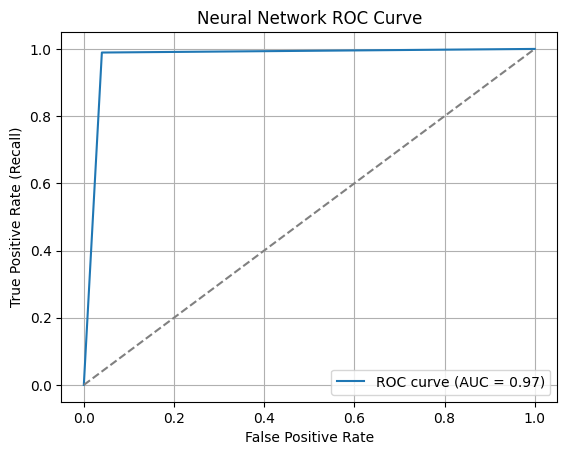

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_test = true labels
# y_scores = predicted probabilities (e.g., model.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)  # Area under the ROC curve

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Neural Network ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
